In [321]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
# rest of the code

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [323]:
%matplotlib inline

In [324]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
np.random.seed(1234)

In [325]:
with open('household_power_consumption.txt','r') as f:
    data = csv.reader(f, delimiter=";")
    power=[]
    for line in data:
        try:
            power.append(float(line[2]))
        except:
            pass
    

In [326]:
power[0], len(power)

(4.216, 2049280)

In [327]:
sequence_length=50
result = []
for index in range(len(power) - sequence_length):
      result.append(power[index: index + sequence_length])
# result = np.array(result)  # shape (2049230, 50)

In [328]:
result=np.array(result)
result.shape

(2049230, 50)

In [329]:
result[0]

array([4.216, 5.36 , 5.374, 5.388, 3.666, 3.52 , 3.702, 3.7  , 3.668,
       3.662, 4.448, 5.412, 5.224, 5.268, 4.054, 3.384, 3.27 , 3.43 ,
       3.266, 3.728, 5.894, 7.706, 7.026, 5.174, 4.474, 3.248, 3.236,
       3.228, 3.258, 3.178, 2.72 , 3.758, 4.342, 4.512, 4.058, 2.472,
       2.79 , 2.624, 2.772, 3.74 , 4.928, 6.052, 6.752, 6.474, 6.308,
       4.464, 3.396, 3.09 , 3.73 , 2.308])

In [330]:
    result_mean = result.mean()
    result -= result_mean
    print ("Shift : ", result_mean)
    print ("Data  : ", result.shape)

Shift :  1.0915781041659507
Data  :  (2049230, 50)


In [331]:
result[0]

array([3.1244219, 4.2684219, 4.2824219, 4.2964219, 2.5744219, 2.4284219,
       2.6104219, 2.6084219, 2.5764219, 2.5704219, 3.3564219, 4.3204219,
       4.1324219, 4.1764219, 2.9624219, 2.2924219, 2.1784219, 2.3384219,
       2.1744219, 2.6364219, 4.8024219, 6.6144219, 5.9344219, 4.0824219,
       3.3824219, 2.1564219, 2.1444219, 2.1364219, 2.1664219, 2.0864219,
       1.6284219, 2.6664219, 3.2504219, 3.4204219, 2.9664219, 1.3804219,
       1.6984219, 1.5324219, 1.6804219, 2.6484219, 3.8364219, 4.9604219,
       5.6604219, 5.3824219, 5.2164219, 3.3724219, 2.3044219, 1.9984219,
       2.6384219, 1.2164219])

In [332]:
result.shape

(2049230, 50)

In [333]:
    row = int(round(0.9 * result.shape[0]))
    train = result[:row, :]
    np.random.shuffle(train)
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = result[row:, :-1]
    y_test = result[row:, -1]

In [334]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1844307, 49), (1844307,), (204923, 49), (204923,))

In [335]:
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [336]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1844307, 49, 1), (1844307,), (204923, 49, 1), (204923,))

In [337]:
with open('household_power_consumption.txt','r') as f:
    data = csv.reader(f, delimiter=";")
    n_power=[]
    for line in data:
        try:
            n_power.append(line[0],float(line[2]))
        except:
            pass

In [338]:
with open('household_power_consumption.txt','r') as f:
    content=f.readlines()
content = [x.strip() for x in content]    

In [339]:
len(content)

2075260

In [340]:
n_power = pd.read_csv('household_power_consumption.txt',delimiter=';',header=0)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [341]:
n_power.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [342]:
n_power.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [343]:
len(n_power)

2075259

In [344]:
n_power.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [345]:
n_power=n_power[['Date','Time','Global_active_power']]

In [346]:
n_power.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [347]:
n_power['DateTime']=n_power.Date+' '+n_power.Time

In [348]:
n_power.head()

,Date,Time,Global_active_power,DateTime
0,16/12/2006,17:24:00,4.216,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,16/12/2006 17:28:00


In [349]:
try:
    pd.to_numeric(n_power.Global_active_power)
except:
    pass

In [350]:
n_power['Global_active_power']=n_power['Global_active_power'].apply(pd.to_numeric,errors='ignore')

In [351]:
n_power.dtypes

Date                   object
Time                   object
Global_active_power    object
DateTime               object
dtype: object

In [352]:
n_power=n_power.drop(['Date','Time'],axis=1)

In [353]:
n_power.head()

,Global_active_power,DateTime
0,4.216,16/12/2006 17:24:00
1,5.36,16/12/2006 17:25:00
2,5.374,16/12/2006 17:26:00
3,5.388,16/12/2006 17:27:00
4,3.666,16/12/2006 17:28:00


In [354]:
n_power.DateTime=pd.to_datetime(n_power.DateTime, format='%d/%m/%Y %H:%M:%S')

In [355]:
n_power.dtypes

Global_active_power            object
DateTime               datetime64[ns]
dtype: object

In [356]:
n_power.Global_active_power = pd.to_numeric(n_power.Global_active_power,errors='coerce',downcast='float')

In [357]:
n_power.dtypes

Global_active_power           float32
DateTime               datetime64[ns]
dtype: object

In [358]:
n_power.isnull().any()

Global_active_power     True
DateTime               False
dtype: bool

In [359]:
n_power=n_power.dropna(axis=0)

In [360]:
n_power.isnull().any()

Global_active_power    False
DateTime               False
dtype: bool

In [361]:
len(n_power)

2049280

In [362]:
n_power=n_power.set_index(['DateTime'])

In [363]:
n_power.head()

,Global_active_power
DateTime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [364]:
n_power.tail()

,Global_active_power
DateTime,
2010-11-26 20:58:00,0.946
2010-11-26 20:59:00,0.944
2010-11-26 21:00:00,0.938
2010-11-26 21:01:00,0.934
2010-11-26 21:02:00,0.932


In [365]:
n_power.iloc[1100000]

Global_active_power    1.266
Name: 2009-01-21 10:35:00, dtype: float32

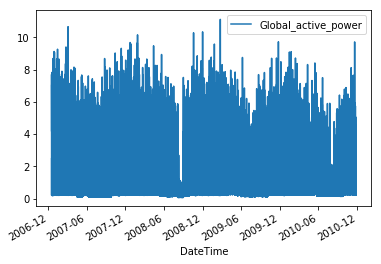

In [366]:
n_power.plot()

In [367]:
from statsmodels.tsa.arima_model import ARIMA

In [368]:
#stationarity; Dickey-Fuller Test; differencing ACF PACF plot

In [369]:
from statsmodels.tsa.stattools import adfuller

In [370]:
test11=n_power.values

In [371]:
test11 = np.reshape(test11,(2049280,))

In [372]:
test11[:100]

array([4.216, 5.36 , 5.374, 5.388, 3.666, 3.52 , 3.702, 3.7  , 3.668,
       3.662, 4.448, 5.412, 5.224, 5.268, 4.054, 3.384, 3.27 , 3.43 ,
       3.266, 3.728, 5.894, 7.706, 7.026, 5.174, 4.474, 3.248, 3.236,
       3.228, 3.258, 3.178, 2.72 , 3.758, 4.342, 4.512, 4.058, 2.472,
       2.79 , 2.624, 2.772, 3.74 , 4.928, 6.052, 6.752, 6.474, 6.308,
       4.464, 3.396, 3.09 , 3.73 , 2.308, 2.388, 4.598, 4.524, 4.202,
       4.472, 2.852, 2.928, 2.94 , 2.934, 2.926, 3.452, 4.87 , 4.868,
       4.866, 3.176, 2.92 , 2.93 , 2.912, 2.608, 2.714, 3.538, 6.072,
       4.536, 4.408, 2.912, 2.326, 2.264, 2.27 , 2.258, 2.188, 2.978,
       4.2  , 4.204, 4.218, 2.786, 2.54 , 2.496, 2.336, 2.322, 2.448,
       4.298, 4.23 , 4.23 , 3.924, 4.218, 4.224, 4.07 , 3.612, 3.458,
       3.434], dtype=float32)

In [373]:
test111=test11[2000000:2049000]

In [374]:
dftest = adfuller(test111, autolag='AIC')
    

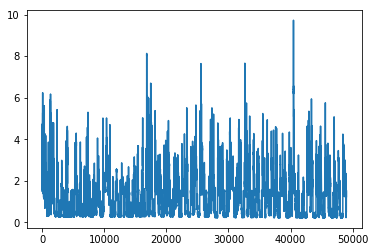

In [375]:
plt.plot(test111)

In [376]:
test111.dtype

dtype('float32')

In [377]:
len(test111)

49000

In [378]:
test111

array([3.51 , 3.782, 3.692, ..., 1.064, 1.086, 1.234], dtype=float32)

In [379]:
test1111=np.diff(test111)

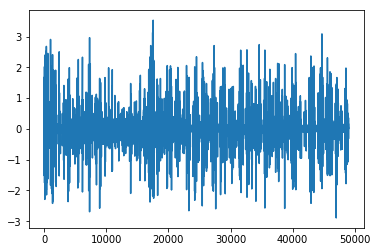

In [380]:
plt.plot(test1111)

In [381]:
dftest1 = adfuller(test1111, autolag='AIC')
    

In [382]:
#reject the null hypothesis as the p value is veyr less and is =3.86*10-26

In [383]:
#so we select the alternate hypothesis which is that sereis is stationary

In [384]:
#test on last 280 values

In [385]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [386]:
lag_acf = acf(test1111, nlags=20)
lag_pacf = pacf(test1111, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

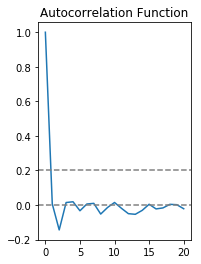

In [387]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')

plt.axhline(y=0.2,linestyle='--',color='gray')
plt.title('Autocorrelation Function')

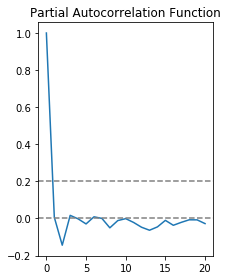

In [388]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=0.2,linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [389]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 2638.0525')

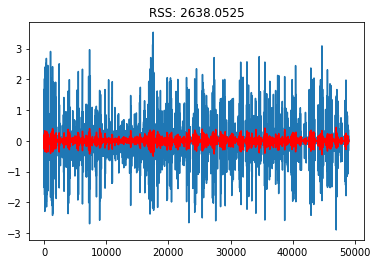

In [390]:
model = ARIMA(test111, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(test1111)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-test1111)**2))

In [391]:
summary = results_ARIMA.summary()

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [392]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                48999
Model:                 ARIMA(2, 1, 2)   Log Likelihood                2055.062
Method:                       css-mle   S.D. of innovations              0.232
Date:                Sun, 25 Mar 2018   AIC                          -4098.125
Time:                        14:28:06   BIC                          -4045.328
Sample:                             1   HQIC                         -4081.571
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.758e-05      0.001     -0.050      0.960      -0.002       0.002
ar.L1.D.y     -0.1410      0.040     -3.550      0.000      -0.219      -0.063
ar.L2.D.y     -0.2040      0.037     -5.544      0.000      -0.276      -0.132
ma.L1.D.y      0.1512      0.041      3.731      0.000       0.072       0.231
ma.L2.D.y      0.0629      0.038      1.643      0.100      -0.012       0.138
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3455           -2.1867j            2.2138           -0.2749
AR.2           -0.3455           +2.1867j            2.2138            0.2749
MA.1           -1.2027           -3.8026j            3.9882           -0.2988
MA.2           -1.2027           +3.8026j            3.9882            0.2988
-----------------------------------------------------------------------------
"""

In [393]:
forecast = results_ARIMA.forecast()[0]
forecast

array([1.23236288])

In [394]:
len(test111)

49000

In [395]:
test111[-1]

1.234

In [396]:
test111[0]

3.51

In [397]:
test11[2048999]

1.234

In [398]:
test11[2049000:2049010]

array([1.102, 0.704, 0.7  , 0.7  , 0.95 , 0.988, 0.988, 0.996, 0.988,
       0.984], dtype=float32)

In [399]:
test11[2049000:2049050]

array([1.102, 0.704, 0.7  , 0.7  , 0.95 , 0.988, 0.988, 0.996, 0.988,
       0.984, 0.978, 0.974, 0.972, 0.972, 0.974, 0.972, 0.97 , 0.976,
       1.054, 1.086, 1.086, 1.086, 1.082, 1.104, 1.084, 1.884, 2.412,
       1.676, 2.018, 1.974, 2.368, 1.91 , 1.692, 1.424, 1.042, 0.898,
       0.89 , 0.898, 1.082, 0.918, 1.166, 0.686, 0.604, 0.614, 0.618,
       0.622, 0.846, 1.734, 1.94 , 2.016], dtype=float32)

In [409]:
results_ARIMA.forecast()

(array([1.23236288]), array([0.23203202]), array([[0.77758847, 1.68713729]]))

In [415]:
len(results_ARIMA.predict())

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


48999

In [444]:
results_ARIMA.predict()

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([-4.75787115e-05,  1.68726478e-03, -3.97273088e-02, ...,
        4.44455933e-02,  1.69942851e-02, -7.17950185e-03])

In [434]:
pp=results_ARIMA.predict(1,50)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [435]:
pp

array([-4.75787115e-05,  1.68726478e-03, -3.97273088e-02,  8.54748380e-03,
        1.36885071e-01,  7.91161214e-03,  3.21598529e-02,  3.37347644e-02,
       -2.04397065e-03,  3.37956693e-03, -7.65787384e-02, -9.60821934e-02,
       -2.66263917e-02,  6.98475868e-02,  2.01066217e-02, -2.44502331e-01,
        3.35738802e-02,  7.58674563e-03, -3.83525814e-03,  2.64361271e-02,
       -6.77142329e-04, -1.77173450e-02,  2.65799790e-03,  5.65998993e-04,
        5.05501119e-04,  3.79297400e-03, -2.63026942e-03,  6.21568126e-02,
        1.96248792e-01,  9.48778418e-02, -2.82528686e-02,  7.23792656e-03,
        9.77563531e-04,  2.07466386e-03,  1.04580402e-02, -1.32154464e-01,
       -4.60280786e-02,  9.06834582e-02,  8.91068042e-02, -1.98261203e-02,
       -2.61065419e-03,  4.64210966e-03, -3.71980401e-05, -5.14036377e-04,
        2.04957780e-03,  2.37509526e-03,  7.12650279e-03, -3.25613032e-02,
       -4.21756653e-03,  1.54118618e-03])

In [437]:
pp1=pp.cumsum()

In [438]:
pp1

array([-4.75787115e-05,  1.63968607e-03, -3.80876227e-02, -2.95401389e-02,
        1.07344932e-01,  1.15256545e-01,  1.47416397e-01,  1.81151162e-01,
        1.79107191e-01,  1.82486758e-01,  1.05908020e-01,  9.82582643e-03,
       -1.68005653e-02,  5.30470215e-02,  7.31536432e-02, -1.71348688e-01,
       -1.37774808e-01, -1.30188062e-01, -1.34023320e-01, -1.07587193e-01,
       -1.08264335e-01, -1.25981680e-01, -1.23323683e-01, -1.22757684e-01,
       -1.22252182e-01, -1.18459208e-01, -1.21089478e-01, -5.89326652e-02,
        1.37316126e-01,  2.32193968e-01,  2.03941099e-01,  2.11179026e-01,
        2.12156590e-01,  2.14231253e-01,  2.24689294e-01,  9.25348294e-02,
        4.65067508e-02,  1.37190209e-01,  2.26297013e-01,  2.06470893e-01,
        2.03860239e-01,  2.08502348e-01,  2.08465150e-01,  2.07951114e-01,
        2.10000692e-01,  2.12375787e-01,  2.19502290e-01,  1.86940987e-01,
        1.82723420e-01,  1.84264606e-01])

In [445]:
pp2=pp1+3.51

In [446]:
pp2

array([3.50995242, 3.51163969, 3.47191238, 3.48045986, 3.61734493,
       3.62525654, 3.6574164 , 3.69115116, 3.68910719, 3.69248676,
       3.61590802, 3.51982583, 3.49319943, 3.56304702, 3.58315364,
       3.33865131, 3.37222519, 3.37981194, 3.37597668, 3.40241281,
       3.40173566, 3.38401832, 3.38667632, 3.38724232, 3.38774782,
       3.39154079, 3.38891052, 3.45106733, 3.64731613, 3.74219397,
       3.7139411 , 3.72117903, 3.72215659, 3.72423125, 3.73468929,
       3.60253483, 3.55650675, 3.64719021, 3.73629701, 3.71647089,
       3.71386024, 3.71850235, 3.71846515, 3.71795111, 3.72000069,
       3.72237579, 3.72950229, 3.69694099, 3.69272342, 3.69426461])